## Esame Metodi Numerici  10 gennaio 2025 - Ore 14

Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **test.mat**.


- Si risolva ciascuno dei sistemi lineari assegnati  utilizzato il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate.
                                      **punti 5**

Per il primo sistema lineare A x= b,  aggiungere una perturbazione dell' 1% sulla componente b[0]  del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria, richiamando il teorema relativo.
                                      **punti 3**


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

 

In [7]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#from SolveTriangular import *

dati = loadmat('test')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)


Matrice quadrata n:  20 m:  20
Spacing:  0.08
condizionamento della matrice A:  9999.999999997151
Matrice simmetrica
matrice def pos


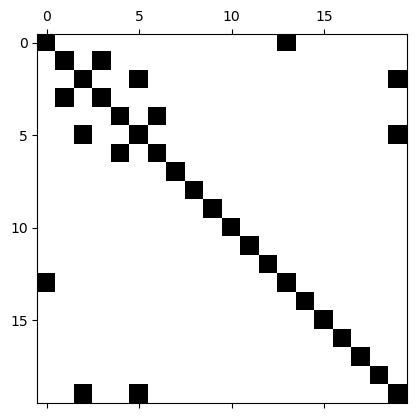

In [8]:
m,n = A.shape
if n!=m:
    print("Matrice non quadrata n: ", n, "m: ", m)
else: 
    print("Matrice quadrata n: ", n, "m: ", m)
sp = np.count_nonzero(A)/(m*n)
print("Spacing: ", sp)
plt.spy(A)
condA= np.linalg.cond(A)
print("condizionamento della matrice A: ", condA)

#verifichiamo se la matrice è simmetrica
flagS = A.T==A
if np.all(flagS == True):
    print("Matrice simmetrica")
else:
    print("matrice non simmetrica")

#verifichiamo sia definita positiva
eigvals= np.linalg.eigvals(A)
if np.all(eigvals)>0:
    print("matrice def pos")
else:
    print("Matrice non def pos")

Matrice quadrata n:  20 m:  20
Spacing:  0.08
condizionamento della matrice A:  9999.999999997151
Matrice simmetrica
matrice def pos


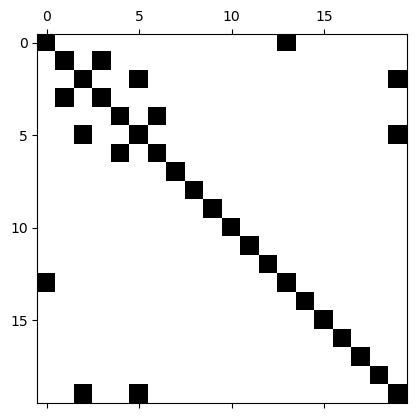

In [9]:
m,n = A.shape
if n!=m:
    print("Matrice non quadrata n: ", n, "m: ", m)
else: 
    print("Matrice quadrata n: ", n, "m: ", m)
sp = np.count_nonzero(A)/(m*n)
print("Spacing: ", sp)
plt.spy(A)
condA= np.linalg.cond(A)
print("condizionamento della matrice A: ", condA)

#verifichiamo se la matrice è simmetrica
flagS = A.T==A
if np.all(flagS == True):
    print("Matrice simmetrica")
else:
    print("matrice non simmetrica")

#verifichiamo sia definita positiva
eigvals= np.linalg.eigvals(A)
if np.all(eigvals)>0:
    print("matrice def pos")
else:
    print("Matrice non def pos")

In [10]:
#Per risolvere sistemi con matrici con piccole dimensioni, simmetriche e
#definite positive uso la fattorizzazione di cholesky
L=sp.linalg.cholesky(A, lower=True)
LT = L.T
y,flag= SolveTriangular.Lsolve(L,b)
x,flag = SolveTrinagular.Usolve(LT,y)
print("Soluzione x: ", x)

AttributeError: 'float' object has no attribute 'linalg'

In [18]:
m1,n1 = A1.shape
if n1!=m1:
    print("Matrice non quadrata")
    if m1>n1:
        print("sistema lineare sovradeterminato")
else: 
    print("Matrice quadrata n: ", n1, "m: ", m1)

condA1=np.linalg.cond(A1)
print("condizionamento matrice A1: ", condA1)

rangoA1=np.linalg.matrix_rank(A1)
dimensione=np.min(A.shape)
if rangoA1==dimensione:
    print("matrice rango massimo")
else: 
    print("matrice non a rango massimo")

Matrice non quadrata
sistema lineare sovradeterminato
condizionamento matrice A1:  5.4550631866614824e+16
matrice non a rango massimo


In [23]:
#essendo la matrice molto mal condizionata e non a
#a rango massimo uso SVDLS
import scipy.linalg as spLin
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=spLin.svd(A)  
    
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    
    d=U.T@b 
    d1=d[:k].reshape(k,1)
    s1=s[:k].reshape(k,1)
    
    c=d1/s1
    x=V[:,:k]@c
    residuo=np.linalg.norm(d[k])**2 
    return x,residuo

In [25]:
x1, residuo1 = SVDLS(A1, b1)
print("X1: ", x1)
print("Residuo: ", residuo1)

X1:  [[0.5210993 ]
 [1.25827182]
 [1.27889527]
 [0.46087355]
 [0.89024294]
 [1.04762977]
 [0.29616227]
 [0.59585228]
 [1.13383321]
 [0.94430646]
 [1.32127485]
 [0.97301581]
 [0.15568769]
 [0.79644108]
 [1.09968922]]
Residuo:  1.9721522630525295e-31



- Dato il sistema lineare 
A3 x3 = b3
dove 

A3=np.array([[8,0,1],[0,12,2],[1,2,-14.0]])
b3= np.array([9.0, 14.0,  -11.0])

- Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di 
matrici     **punti[1]**.
- Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A3 x3= b3 con  **punti[3]**.

Totale **Punti 12**

In [33]:
A3=np.array([[8,0,1],[0,12,2],[1,2,-14.0]]) 
b3= np.array([9.0, 14.0, -11.0])
m3,n3 = A3.shape
if n3!=m3:
    print("Matrice non quadrata")
    if m3>n3:
        print("sistema lineare sovradeterminato")
else: 
    print("Matrice quadrata n: ", n3, "m: ", m3)
flagS3 = A.T==A
sim = False
defpos= False
if np.all(flagS3==True):
    simm = True
eigvals3= np.linalg.eigvals(A3)
if np.all(eigavals3)>0:
    defpos = True
if defpos and simm:
    print("Il metodo converge perchè A3 è simmetrice e definita positiva")
else:
    print("matrice non simm e def pos")

Matrice quadrata n:  3 m:  3
Il metodo converge perchè A3 è simmetrice e definita positiva


In [41]:
from SolveTriangular import *
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F 
    T=np.linalg.inv(M)@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore >= toll:
        x,flag=Lsolve(M, b-F@x0) 
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

ModuleNotFoundError: No module named 'SolveTriangular'

In [38]:
toll = 1e-6
it_max=1000
x0=np.zeros_like(b)

x3,it3, er_vet3 = gauss_seidel(A3, b3, x0, toll, it_max)
print("IT: ", it)
print(x.shape)

plt.semilogy(range(len(er_vet3)),er_vet3)

raggio spettrale Gauss-Seidel  0.03273809523809523


NameError: name 'Lsolve' is not defined

# Esercizio 2

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 
                                       **[4 punti]**
                                                         

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$,
facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75 e si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;
                                          **[2 punti]**

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula 
                                                             **[3 punti]**

si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.   **[1 punto]**

Si calcoli la costante di Lebesgue per il problema di interpolazione in esame  e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale
                               **[3 punti]**

Totale **Punti 13**

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**Risolvere un problema mediante Machine Learning significa**:
- Fornire alla macchina i dati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina le esatte istruzioni per risolvere il problema
edizione

**2  A cosa serve il validation set?**

-  A trovare i migliori iperparametri del modello

-  Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Una classica rete CNN è solitamente composta da:**

· Layer convolutivi seguiti da layer di pooling, flatten layer e neuroni completamente connessi

· Layer di pooling seguiti da layer convolutivi, flatten layer e neuroni completamente connessi

· Layer convolutivi seguiti da layer di pooling, flatten layer e softmax

· Layer di pooling seguiti da layer convolutivi, flatten layer e softmax

**4 Il livello softmax**
- Trasforma i digits della rete in probabilità
- Trasforma le probabilità della rete in digits
- Normalizza i valori di input della rete
- È indispensabile nel task di regressione
lla rete

**5 Per una rete neurale, l’apprendimento è legato a:**
- 	Minimizzare la funzione obiettivo
- Minimizzare la funzione di attivazione
- 	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation
- Massimizzare il valore della funzione di training


**Domande Aperte**

**6. Spiega in modo dettagliato come il learning rate influenza la convergenza di una rete neurale durante il training. Quali sono le conseguenze di un learning rate troppo alto o troppo basso nel training di una rete neurale. Descrivi le principali strategie di  aggiornamentodel  learning rate durante il training di una rete neurale.** [punti 1.5]

**7. Descrivi in dettaglio l'algoritmo di discesa del gradiente con momento. Quali sono le motivazioni che hanno portato alla sua introduzione rispetto alla discesa del gradiente standard? Fornisci la formula matematica dell'aggiornamento dei pesi in questo algoritmo e spiega il ruolo del termine di momento** [punti 3]